In [1]:
import numpy as np 
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt #for plotting graphs
import seaborn as sns
import geopandas as gpd


In [2]:
# read data
df = pd.read_csv("./World-happiness-report-updated_2024.csv", encoding='latin-1')
df_2024 = pd.read_csv("./World-happiness-report-2024.csv", encoding='latin-1')
df.head(5)

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,Afghanistan,2008,3.724,7.350,0.451,50.5,0.718,0.164,0.882,0.414,0.258
1,Afghanistan,2009,4.402,7.509,0.552,50.8,0.679,0.187,0.850,0.481,0.237
2,Afghanistan,2010,4.758,7.614,0.539,51.1,0.600,0.118,0.707,0.517,0.275
3,Afghanistan,2011,3.832,7.581,0.521,51.4,0.496,0.160,0.731,0.480,0.267
4,Afghanistan,2012,3.783,7.661,0.521,51.7,0.531,0.234,0.776,0.614,0.268


In [3]:
df_2024.head(5)

,Country name,Regional indicator,Ladder score,upperwhisker,lowerwhisker,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.741,7.815,7.667,1.844,1.572,0.695,0.859,0.142,0.546,2.082
1,Denmark,Western Europe,7.583,7.665,7.500,1.908,1.520,0.699,0.823,0.204,0.548,1.881
2,Iceland,Western Europe,7.525,7.618,7.433,1.881,1.617,0.718,0.819,0.258,0.182,2.050
3,Sweden,Western Europe,7.344,7.422,7.267,1.878,1.501,0.724,0.838,0.221,0.524,1.658
4,Israel,Middle East and North Africa,7.341,7.405,7.277,1.803,1.513,0.740,0.641,0.153,0.193,2.298


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2363 entries, 0 to 2362
Data columns (total 11 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country name                      2363 non-null   object 
 1   year                              2363 non-null   int64  
 2   Life Ladder                       2363 non-null   float64
 3   Log GDP per capita                2335 non-null   float64
 4   Social support                    2350 non-null   float64
 5   Healthy life expectancy at birth  2300 non-null   float64
 6   Freedom to make life choices      2327 non-null   float64
 7   Generosity                        2282 non-null   float64
 8   Perceptions of corruption         2238 non-null   float64
 9   Positive affect                   2339 non-null   float64
 10  Negative affect                   2347 non-null   float64
dtypes: float64(9), int64(1), object(1)
memory usage: 203.2+ KB


In [5]:
df_2024.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143 entries, 0 to 142
Data columns (total 12 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Country name                  143 non-null    object 
 1   Regional indicator            143 non-null    object 
 2   Ladder score                  143 non-null    float64
 3   upperwhisker                  143 non-null    float64
 4   lowerwhisker                  143 non-null    float64
 5   Log GDP per capita            140 non-null    float64
 6   Social support                140 non-null    float64
 7   Healthy life expectancy       140 non-null    float64
 8   Freedom to make life choices  140 non-null    float64
 9   Generosity                    140 non-null    float64
 10  Perceptions of corruption     140 non-null    float64
 11  Dystopia + residual           140 non-null    float64
dtypes: float64(10), object(2)
memory usage: 13.5+ KB


In [3]:
# Data cleaning for both dfs
numeric_cols = df_2024.select_dtypes(include=np.number).columns
df_2024[numeric_cols] = df_2024[numeric_cols].fillna(df_2024[numeric_cols].mean())
numeric_cols = df.select_dtypes(include=np.number).columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())

In [4]:
df.isnull().sum()

Country name                        0
year                                0
Life Ladder                         0
Log GDP per capita                  0
Social support                      0
Healthy life expectancy at birth    0
Freedom to make life choices        0
Generosity                          0
Perceptions of corruption           0
Positive affect                     0
Negative affect                     0
dtype: int64

In [5]:
top5_names = df_2024.nlargest(5, 'Ladder score')['Country name'].tolist()
bottom5_names = df_2024.nsmallest(5, 'Ladder score')['Country name'].tolist()
extrem_names = top5_names + bottom5_names
extrem_names

['Finland',
 'Denmark',
 'Iceland',
 'Sweden',
 'Israel',
 'Afghanistan',
 'Lebanon',
 'Lesotho',
 'Sierra Leone',
 'Congo (Kinshasa)']

<Figure size 1500x1500 with 0 Axes>

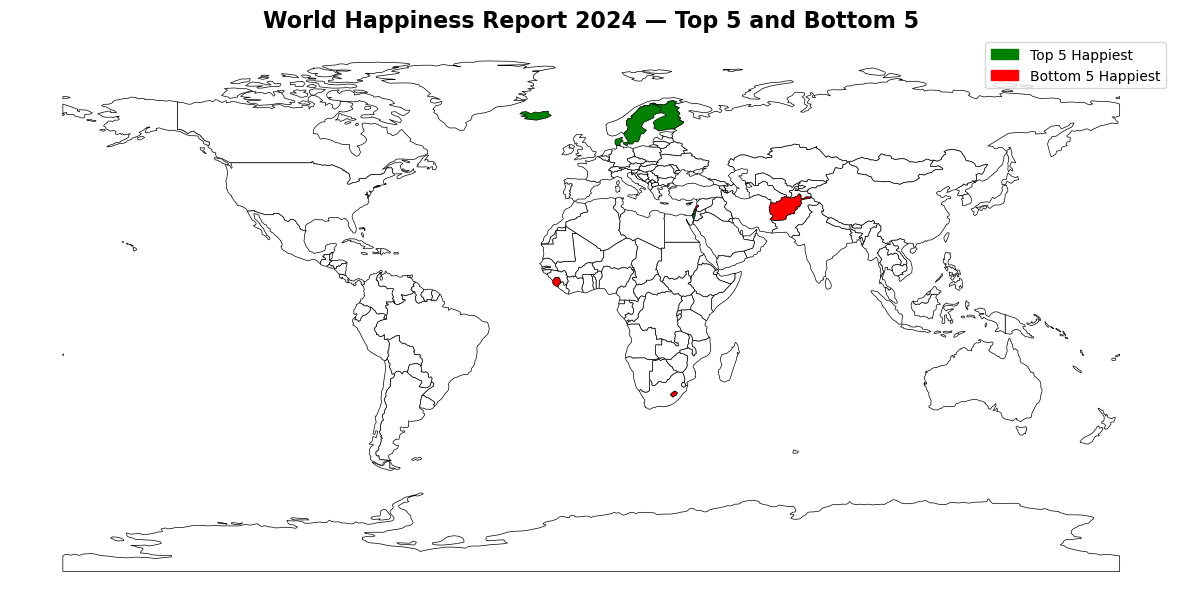

In [47]:


# Load world map from geopandas
url = "https://naciscdn.org/naturalearth/110m/cultural/ne_110m_admin_0_countries.zip"
world = gpd.read_file(url)

# Merge datasets
top5 = df_2024.nlargest(5, 'Ladder score')['Country name'].tolist()
bottom5 = df_2024.nsmallest(5, 'Ladder score')['Country name'].tolist()
# extrem_names = top5_names + bottom5_names

# for index, row in df_2024.iterrows():
#     if row['Country name'] not in extrem_names:
#         df_2024.at[index, 'Ladder score'] = 10

merged = world.merge(df_2024, left_on='ADMIN', right_on='Country name', how='left')
def assign_color(country):
    if country in top5:
        return 'green'
    elif country in bottom5:
        return 'red'
    else:
        return 'white'

merged['color'] = merged['ADMIN'].apply(assign_color)

# Plot world map
plt.figure(figsize=(15,15))
# merged.plot(column='Ladder score', cmap='viridis', legend=True, 
#             legend_kwds={'label': "Happiness Score (2024)"})
fig, ax = plt.subplots(figsize=(15, 8))
merged.plot(color=merged['color'], edgecolor='black', linewidth=0.5, ax=ax)
# Add title and legend handles
import matplotlib.patches as mpatches
legend_patches = [
    mpatches.Patch(color='green', label='Top 5 Happiest'),
    mpatches.Patch(color='red', label='Bottom 5 Happiest')
    # mpatches.Patch(color='white', edgecolor='black', label='Other Countries')
]

ax.legend(handles=legend_patches, loc='upper right', frameon=True)
ax.set_title("World Happiness Report 2024 — Top 5 and Bottom 5", fontsize=16, fontweight='bold')
ax.axis('off')
# plt.axis('off')
plt.savefig('./World_selected.png', bbox_inches='tight')
plt.show()

C:\Users\ljw44\AppData\Local\Temp\ipykernel_16708\423344118.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x = 'Ladder score', y= 'Country name', data = combined, palette = 'coolwarm')


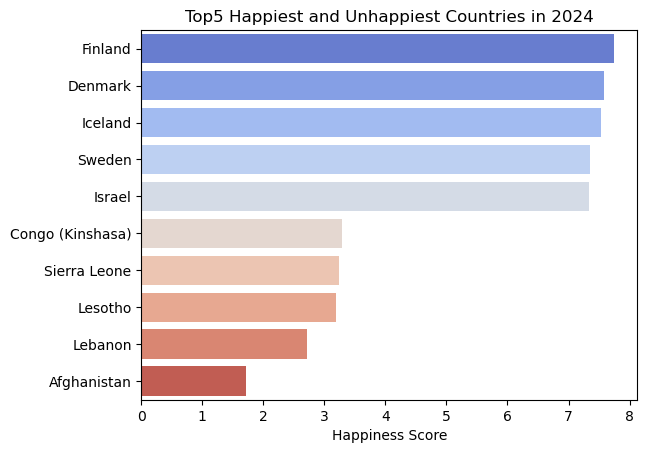

In [12]:
# === 2. Identify top and bottom 5 countries ===
top5 = df_2024.nlargest(5, 'Ladder score')
bottom5 = df_2024.nsmallest(5, 'Ladder score')
combined = pd.concat([top5, bottom5]).sort_values('Ladder score', ascending=False)

ax = sns.barplot(x = 'Ladder score', y= 'Country name', data = combined, palette = 'coolwarm')
ax.set_xlabel('Happiness Score')
ax.set(ylabel=None) 
plt.title('Top5 Happiest and Unhappiest Countries in 2024')
plt.savefig('./top5.png', bbox_inches='tight')
plt.show()

In [40]:
df_2024.columns.tolist()

['Country name',
 'Regional indicator',
 'Ladder score',
 'upperwhisker',
 'lowerwhisker',
 'Log GDP per capita',
 'Social support',
 'Healthy life expectancy',
 'Freedom to make life choices',
 'Generosity',
 'Perceptions of corruption',
 'Dystopia + residual']

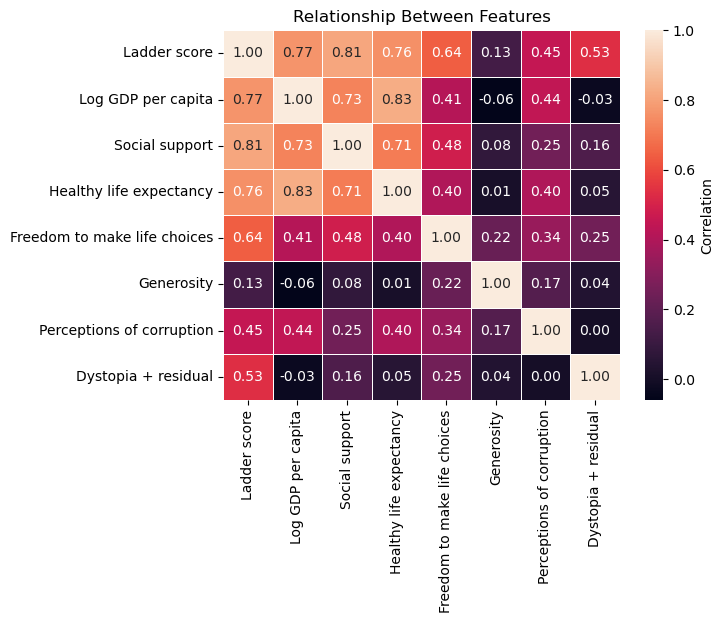

In [17]:
# Drop non-relevant columns

non_relevant_columns = ['Country name','Regional indicator','upperwhisker','lowerwhisker']
df_2024_numeric = df_2024.drop(columns=non_relevant_columns)
correlation_matrix = df_2024_numeric.corr()
sns.heatmap(correlation_matrix, annot = True, fmt ='.2f', linewidth = .7, cbar_kws={'label': 'Correlation'})
plt.title('Relationship Between Features')
plt.savefig('./Correlation_Matrix.png', bbox_inches='tight')
plt.show()